In [4]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


## Data Import

In [5]:
new = pd.read_excel(r"C:\Users\dipak\Downloads\GithHub\Basic Machine Learning\Linear Regression\AirPollution.xls") 
new

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer
...,...,...,...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09,Bhosari,2004-09-01,Monsoon
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14,Bhosari,2004-09-08,Monsoon
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64,Bhosari,2004-09-15,Monsoon
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95,Bhosari,2004-09-22,Monsoon


## Data Type 

In [6]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PM10    151 non-null    float64       
 1   Pb      151 non-null    float64       
 2   Cd      151 non-null    float64       
 3   Cu      151 non-null    float64       
 4   Cr      151 non-null    float64       
 5   Zn      151 non-null    int64         
 6   NOx     151 non-null    float64       
 7   SO2     151 non-null    float64       
 8   Site    151 non-null    object        
 9   Date    151 non-null    datetime64[ns]
 10  Season  151 non-null    object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 13.1+ KB


In [7]:
new = new.drop(['Site','Date','Season'],axis=1)
new

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23
...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95


In [8]:
new.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23


## Univariate Analysis

In [9]:
new.describe()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.000000,151.000000
mean,68.536026,0.716358,0.000265,0.331854,0.390066,0.0,42.692914,22.359868
std,40.908548,0.673069,0.001982,0.408259,0.434575,0.0,23.101723,10.393498
min,16.240000,0.000000,0.000000,0.000000,0.000000,0.0,8.260000,0.000000
25%,37.005000,0.220000,0.000000,0.040000,0.085000,0.0,25.735000,15.165000
50%,59.610000,0.570000,0.000000,0.130000,0.230000,0.0,37.000000,20.930000
75%,89.820000,0.965000,0.000000,0.535000,0.580000,0.0,54.695000,27.420000
max,194.740000,3.490000,0.020000,1.650000,3.220000,0.0,121.460000,53.270000


In [10]:
new = new.drop(['Zn','Cd'],axis=1)
new

,PM10,Pb,Cu,Cr,NOx,SO2
0,120.71,2.67,0.53,0.61,84.17,40.37
1,140.25,3.49,0.10,0.91,88.81,39.48
2,107.01,1.31,0.19,0.48,81.49,48.29
3,88.81,0.76,0.33,0.39,61.80,27.42
4,75.05,0.60,0.41,1.54,48.71,19.23
...,...,...,...,...,...,...
146,40.13,0.10,0.04,0.09,18.88,10.09
147,40.38,0.10,0.03,0.09,47.56,24.14
148,31.28,0.11,0.02,0.05,31.53,26.64
149,52.10,0.48,0.04,0.06,42.08,22.95


## Step 3 =  EDA

<AxesSubplot:>

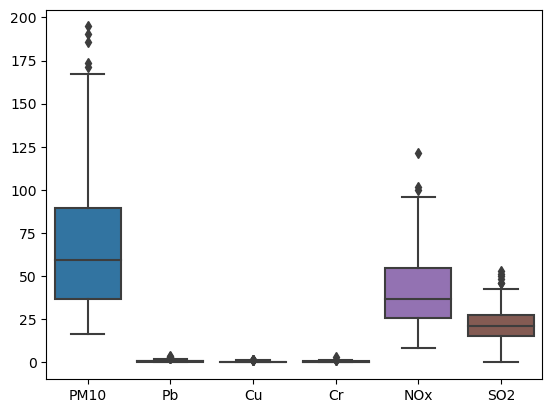

In [11]:
sns.boxplot(data=new)

In [12]:
q1 = new['PM10'].quantile(0.25)
q3 = new['PM10'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

169.0425

In [13]:
new['PM10']=np.where(new['PM10'] > upper_limit,upper_limit,new['PM10']) # upper limit

<AxesSubplot:>

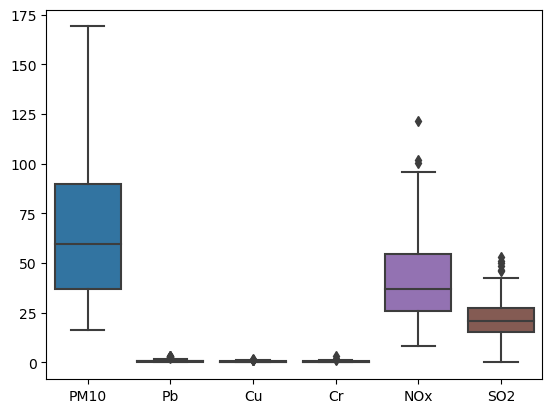

In [14]:
sns.boxplot(data=new)

In [15]:
q1 = new['NOx'].quantile(0.25)
q3 = new['NOx'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

98.13499999999999

In [16]:
new['NOx']=np.where(new['NOx'] > upper_limit,upper_limit,new['NOx'])

<AxesSubplot:>

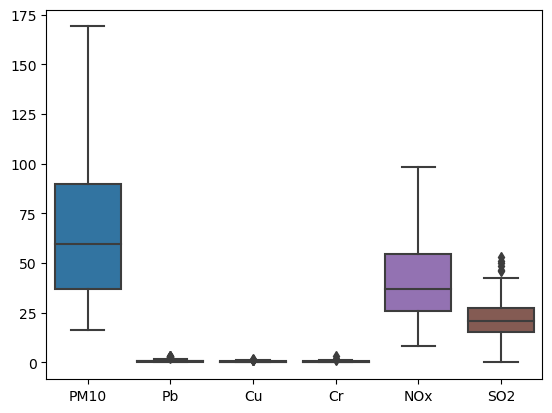

In [17]:
sns.boxplot(data=new)

In [18]:
q1 = new['SO2'].quantile(0.25)
q3 = new['SO2'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

45.80250000000001

In [19]:
new['SO2']=np.where(new['SO2'] > upper_limit,upper_limit,new['SO2'])

<AxesSubplot:>

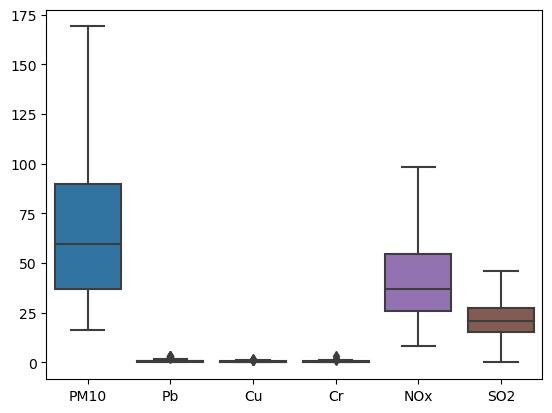

In [20]:
sns.boxplot(data=new)

In [21]:
q1 = new['Pb'].quantile(0.25)
q3 = new['Pb'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

2.0825

In [22]:
new['Pb']=np.where(new['Pb'] > upper_limit,upper_limit,new['Pb'])

<AxesSubplot:>

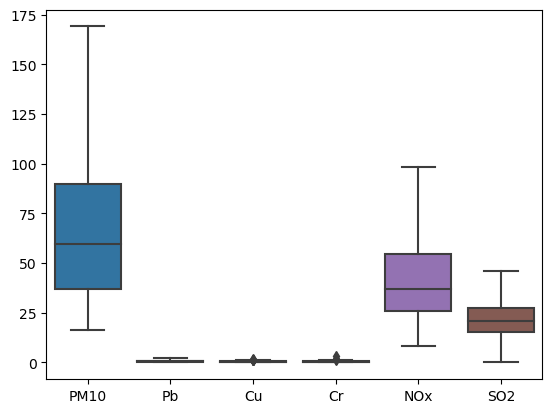

In [23]:
sns.boxplot(data=new)

<AxesSubplot:>

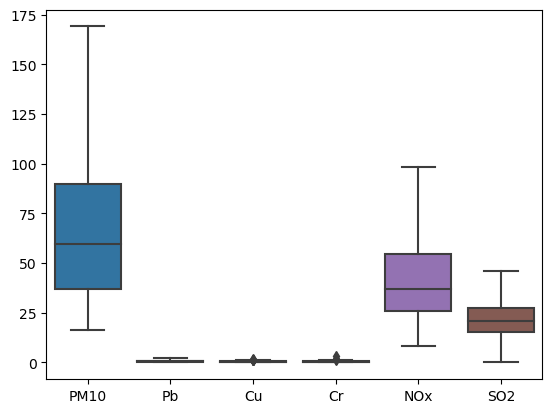

In [24]:
sns.boxplot(data=new)

In [25]:
q1 = new['Cu'].quantile(0.25)
q3 = new['Cu'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1.2775

In [26]:
new['Cu']=np.where(new['Cu'] > upper_limit,upper_limit,new['Cu'])

<AxesSubplot:>

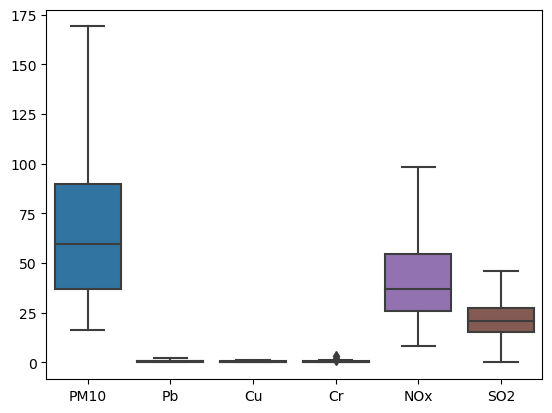

In [27]:
sns.boxplot(data=new)

In [28]:
q1 = new['Cr'].quantile(0.25)
q3 = new['Cr'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1.3224999999999998

In [29]:
new['Cr']=np.where(new['Cr'] > upper_limit,upper_limit,new['Cr'])

<AxesSubplot:>

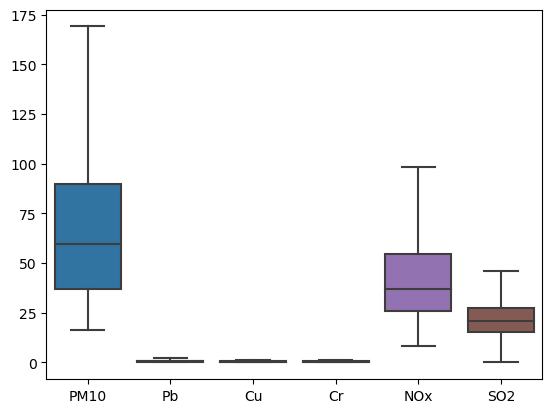

In [30]:
sns.boxplot(data=new)

In [31]:
new.describe()

,PM10,Pb,Cu,Cr,NOx,SO2
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,68.06856,0.679983,0.327053,0.372848,42.501755,22.226656
std,39.61346,0.560941,0.395327,0.361985,22.551657,10.049931
min,16.24000,0.000000,0.000000,0.000000,8.260000,0.000000
25%,37.00500,0.220000,0.040000,0.085000,25.735000,15.165000
50%,59.61000,0.570000,0.130000,0.230000,37.000000,20.930000
75%,89.82000,0.965000,0.535000,0.580000,54.695000,27.420000
max,169.04250,2.082500,1.277500,1.322500,98.135000,45.802500


# Missing Value

In [32]:
new.isna().sum()

PM10    0
Pb      0
Cu      0
Cr      0
NOx     0
SO2     0
dtype: int64

## Step 4 = Splitting the data into train and test set

In [33]:
new.head()

,PM10,Pb,Cu,Cr,NOx,SO2
0,120.71,2.0825,0.53,0.6100,84.17,40.3700
1,140.25,2.0825,0.10,0.9100,88.81,39.4800
2,107.01,1.3100,0.19,0.4800,81.49,45.8025
3,88.81,0.7600,0.33,0.3900,61.80,27.4200
4,75.05,0.6000,0.41,1.3225,48.71,19.2300


In [34]:
# Putting feature variable to X
X = new.drop('PM10', axis= 1)

# Putting response variable to y
y = new[['PM10']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

# Step 5 

In [35]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,PM10,Pb,Cu,Cr,NOx,SO2
125,26.19,0.00,0.16,0.04,22.14,10.93
48,40.92,0.39,0.08,0.21,26.00,13.66
149,52.10,0.48,0.04,0.06,42.08,22.95
55,90.48,0.72,0.00,0.02,39.16,15.72
63,141.11,1.39,0.53,0.71,80.72,34.31


## Correlation Matrix

In [36]:
np.round(df.corr(),2)

,PM10,Pb,Cu,Cr,NOx,SO2
PM10,1.00,0.88,0.70,0.84,0.55,0.52
Pb,0.88,1.00,0.64,0.77,0.65,0.60
Cu,0.70,0.64,1.00,0.76,0.44,0.43
Cr,0.84,0.77,0.76,1.00,0.48,0.44
NOx,0.55,0.65,0.44,0.48,1.00,0.86
SO2,0.52,0.60,0.43,0.44,0.86,1.00


<AxesSubplot:>

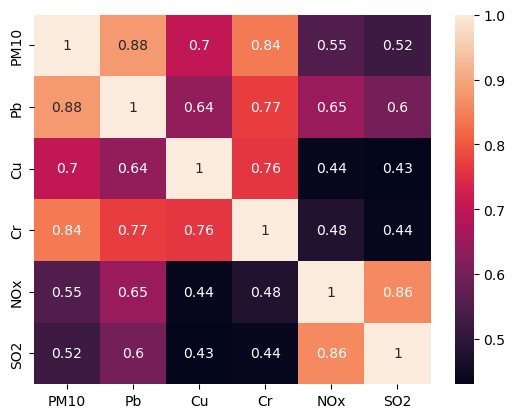

In [37]:
sns.heatmap(np.round(df.corr(),2),annot = True)

In [38]:
# vif calculation 
X1=df.drop(['PM10','NOx'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Pb     7.687853
Cu     3.751185
Cr     6.589538
SO2    3.835246
dtype: float64

# Step 9 

In [39]:
import statsmodels.formula.api as smf
model = smf.ols('PM10 ~ Pb + Cu + Cr + SO2',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     133.6
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           3.25e-39
Time:                        18:04:55   Log-Likelihood:                -435.83
No. Observations:                 105   AIC:                             881.7
Df Residuals:                     100   BIC:                             894.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6108      3.865      5.850      0.000      14.942      30.279
Pb            43.6485      5.405      8.076      0.000      32.926      54.371
Cu             6.6132      7.008      0.944      0.348      -7.291      20.517
Cr            40.1701      8.294      4.843      0.000      23.715      56.625
SO2           -0.0051      0.205     -0.025      0.980      -0.412       0.401
==============================================================================
Omnibus:                        2.997   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.765
Skew:                           0.397   Prob(JB):                        0.251
Kurtosis:                       2.974   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
import statsmodels.formula.api as smf
model2 = smf.ols('PM10 ~ Pb + Cr',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     269.7
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.87e-41
Time:                        18:04:55   Log-Likelihood:                -436.30
No. Observations:                 105   AIC:                             878.6
Df Residuals:                     102   BIC:                             886.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4490      2.407      9.328      0.000      17.675      27.223
Pb            44.2223      4.791      9.230      0.000      34.719      53.726
Cr            44.4242      6.901      6.438      0.000      30.737      58.111
==============================================================================
Omnibus:                        2.564   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.278   Jarque-Bera (JB):                2.275
Skew:                           0.360   Prob(JB):                        0.321
Kurtosis:                       3.019   Cond. No.                         6.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Step 10

In [41]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,PM10,Pb,Cu,Cr,NOx,SO2,fitted_value,residual
125,26.19,0.00,0.16,0.04,22.14,10.93,24.225925,1.964075
48,40.92,0.39,0.08,0.21,26.00,13.66,49.024738,-8.104738
149,52.10,0.48,0.04,0.06,42.08,22.95,46.341115,5.758885
55,90.48,0.72,0.00,0.02,39.16,15.72,55.177501,35.302499
63,141.11,1.39,0.53,0.71,80.72,34.31,115.459146,25.650854


<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

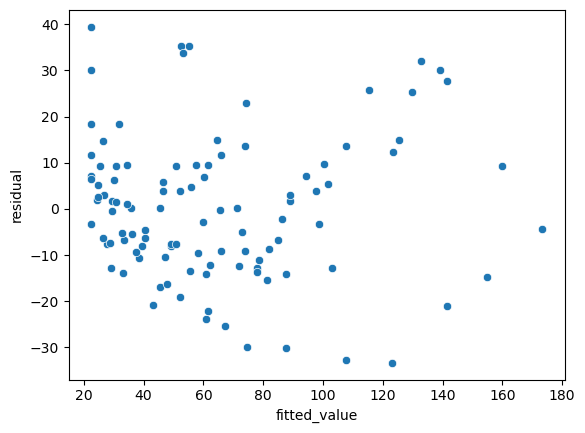

In [42]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

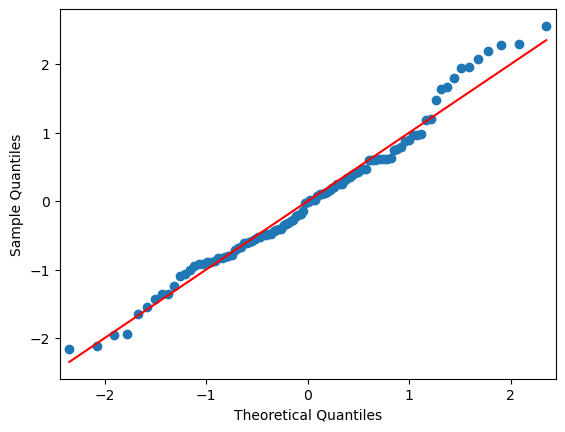

In [43]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

<AxesSubplot:ylabel='Frequency'>

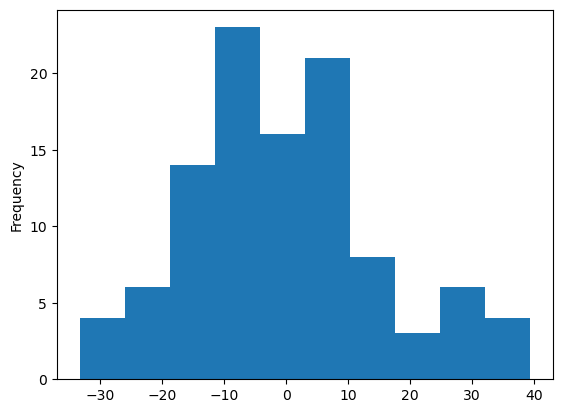

In [44]:
df['residual'].plot.hist()

# Step 11  = Working on Test 

In [45]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,Pb,Cu,Cr,NOx,SO2,PM10
62,1.42,0.11,0.92,95.74,45.8025,153.89
143,0.00,0.00,0.00,30.52,24.5100,37.08
86,1.86,0.97,0.79,78.57,28.7700,99.98
80,0.81,0.83,0.54,39.49,14.8700,81.15
100,0.98,0.97,0.94,33.19,19.1500,101.86


In [46]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Pb,Cu,Cr,NOx,SO2,PM10,Prediction
62,1.42,0.11,0.92,95.74,45.8025,153.89,126.114898
143,0.00,0.00,0.00,30.52,24.5100,37.08,22.448956
86,1.86,0.97,0.79,78.57,28.7700,99.98,139.797566
80,0.81,0.83,0.54,39.49,14.8700,81.15,82.258094
100,0.98,0.97,0.94,33.19,19.1500,101.86,107.545567


In [47]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.PM10, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.74
